# Resumos e um pouco de Visualização no pandas


## Resumo

Vamos ver alguns métodos para analisar nossas tabelas (dataframes)

Além disso, vamos usar os plot de gráfico padrões do pandas, mas no projeto de DataScience veremos outras mais bonitas e também muito práticas.

OBS: O pandas usa o matplotlib (que vimos na seção de "módulos e bibliotecas") para plotar gráficos.<br>
Se quiser personalizar mais do que o padrão do pandas, importe o matplotlib e use os métodos do matplotlib

- Preparando as bases de dados (o que fizemos na última aula)

In [1]:
import pandas as pd
#importando os arquivos
vendas_df = pd.read_csv(r'C:\Users\ricar\Documents\GitHub\Python_Impressionador\Pandas\dados\Contoso - Vendas - 2017.csv', sep=';', encoding='ISO-8859-1')
produtos_df = pd.read_csv(r'C:\Users\ricar\Documents\GitHub\Python_Impressionador\Pandas\dados\Contoso - Cadastro Produtos.csv', sep=';', encoding='ISO-8859-1')
lojas_df = pd.read_csv(r'C:\Users\ricar\Documents\GitHub\Python_Impressionador\Pandas\dados\Contoso - Lojas.csv', sep=';', encoding='ISO-8859-1')
clientes_df = pd.read_csv(r'C:\Users\ricar\Documents\GitHub\Python_Impressionador\Pandas\dados\Contoso - Clientes.csv', sep=';', encoding='ISO-8859-1')

#limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

#mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})
vendas_df.head(3)

C:\Users\ricar\AppData\Local\Temp\ipykernel_11532\25055092.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,cshawd4@technorati.com
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,kgorriekd@bandcamp.com


### Qual cliente que comprou mais vezes?

- Usaremos o método .value_counts() para contar quantas vezes cada valor do Dataframe aparece
- Usaremos o método .plot() para exibir um gráfico

<Axes: xlabel='E-mail do Cliente'>

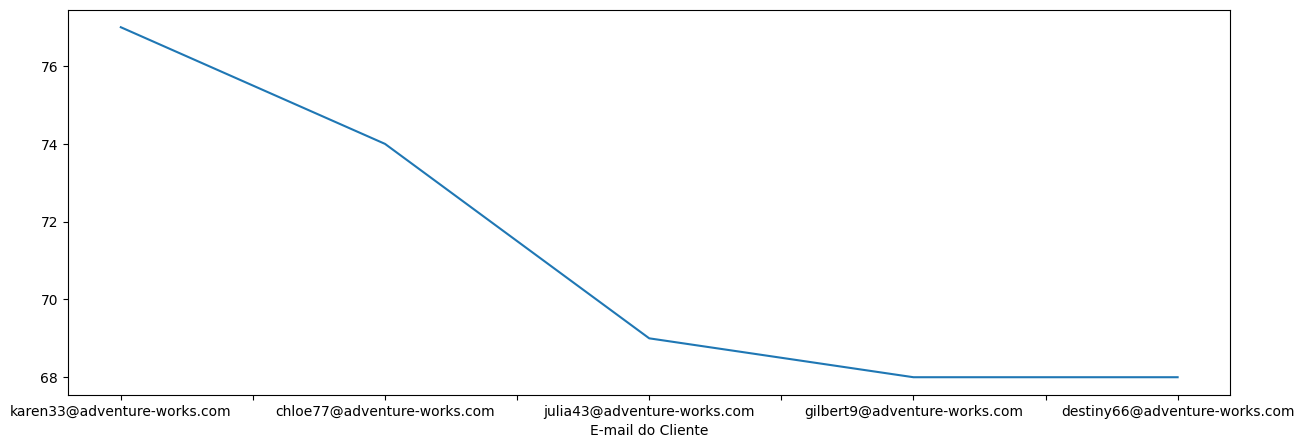

In [2]:
frequencia_cliente = vendas_df['E-mail do Cliente'].value_counts()
frequencia_cliente[:5].plot(figsize=(15,5))

### Qual a Loja que mais vendeu?

- Usaremos o .groupby para agrupar o nosso dataframe, de acordo com o que queremos (somando as quantidades de vendas, por exemplo)

In [3]:
vendas_loja = vendas_df[['Nome da Loja','Quantidade Vendida']]
vendas_loja = vendas_loja.groupby(['Nome da Loja']).sum()
display(vendas_loja)

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


- Agora precisamos pegar o maior valor. Temos 2 formas:
    1. Ordenar o dataframe em ordem decrescente de Quantidade Vendida
        - Método .sort_values
    2. Pegar o Maior valor diretamente
        - Métodos .max() e .idxmax()

<Axes: xlabel='Nome da Loja'>

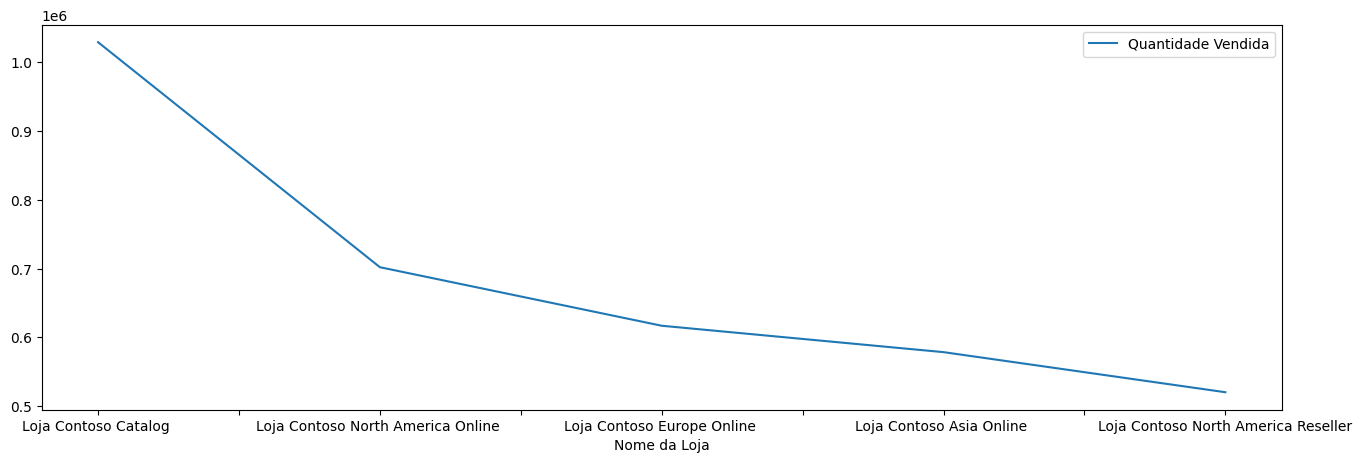

In [4]:
#ordenando o dataframe
vendas_loja = vendas_loja.sort_values('Quantidade Vendida', ascending=False)
#podemos plotar em um gráfico
vendas_loja[:5].plot(figsize=(16, 5))

In [5]:
#pegando o maior valor e se índice
maior_valor = vendas_loja['Quantidade Vendida'].max()
melhor_loja = vendas_loja['Quantidade Vendida'].idxmax()
print(f'{melhor_loja} | {maior_valor:_.0f} Unidades vendidas'.replace(',','.').replace('_','.'))

Loja Contoso Catalog  | 1.029.117 Unidades vendidas


### Qual produto que menos vendeu?

- Já temos uma lista criada para isso, basta verificarmos o final da lista (já que ela está ordenada) ou então usarmos os métodos:
    1. min()
    2. idxmin()

In [6]:
menor_valor = vendas_loja['Quantidade Vendida'].min()
pior_loja = vendas_loja['Quantidade Vendida'].idxmin()
print(f'{pior_loja} | {menor_valor:_.0f} Unidades vendidas'.replace(',','.').replace('_','.'))

Loja Contoso Venezia  | 234 Unidades vendidas
